In [1]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import random as rand
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import time
import math

In [2]:
from flt3_data_loading import km_normed_1, flt3_filtered
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, test_size=0.1, random_state=3, stratify=None)

In [3]:
# 100 batch size + low validation fraction + adaptive lr with stratify=None?
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, 
                                                    test_size=0.1, random_state=3, 
                                                    stratify=None)
classifier_norm_1 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0,
                           batch_size=100
                           )
                           #,early_stopping=True, n_iter_no_change=1000, 
                           #validation_fraction=0.1)
classifier_norm_1.fit(x_train, y_train)

MLPClassifier(batch_size=100, hidden_layer_sizes=(2048, 512, 128, 32, 8),
              learning_rate='adaptive', max_iter=1000, random_state=3,
              solver='sgd', tol=0, verbose=0)

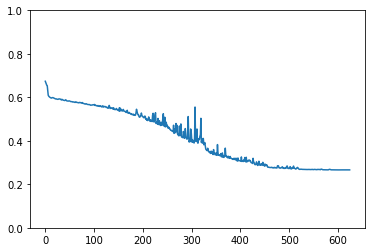

0.5104166666666667


In [4]:
plt.plot(classifier_norm_1.loss_curve_)
#plt.plot(classifier_norm_1.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_norm_1.predict(x_test)
print(roc_auc_score(y_test, y_pred))

In [6]:
print(X)

NameError: name 'X' is not defined

In [9]:
classifier_norm_1.coefs_

[array([[ 0.00395645,  0.01106785, -0.01401123, ..., -0.0273532 ,
          0.02734637, -0.02616883],
        [-0.00145042,  0.00883882,  0.0079016 , ...,  0.01147266,
         -0.00731816,  0.0103721 ],
        [ 0.003118  , -0.02939351, -0.01466196, ..., -0.01395979,
         -0.01367298, -0.01728457],
        ...,
        [-0.02364639, -0.02229902,  0.0118415 , ..., -0.02198908,
         -0.02850876, -0.023131  ],
        [-0.0009663 , -0.01151399, -0.00068901, ..., -0.0047288 ,
          0.01287764,  0.01147097],
        [ 0.02133243,  0.02642923,  0.02824448, ...,  0.00546205,
          0.0078069 ,  0.00560876]]),
 array([[-0.03139027,  0.04161352,  0.02994778, ..., -0.03362836,
          0.0184997 , -0.01530416],
        [-0.02185907, -0.03163907, -0.03566996, ..., -0.02990389,
          0.03835865, -0.04271836],
        [-0.04853899,  0.01049183,  0.01532731, ..., -0.04540574,
          0.03586874,  0.04048549],
        ...,
        [ 0.03872948,  0.04690262,  0.00750104, ...,  